<a href="https://colab.research.google.com/github/sahriahs/Praktikum_KB/blob/master/Posttest_5_KB/2109106087_Sahriah_Posttest5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Posttest 5
##Nama  : Sahriah
##NIM   : 2109106087
##Kelas : C1'22

Buatlah model deep learning dengan ketentuan sebagai berikut:
Instruksi:
* Dataset tidak boleh sama antar praktikan
* Minimal akurasi training 70% dan validation 70%
* Gunakan sequential model
* Buat model deep learning sederhana
* Rekomendasi: Gunakan dataset yang sudah bersih seperti dari library sklearn, tensorflow, MNIST, atau dari library lainnya

In [ ]:
import library yang akan digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/sahriahs/Praktikum_KB/refs/heads/master/Posttest_3_KB/heart_posttest3.csv")
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,0.244898,1,1,0.70,0.479270,0,1,0.788732,0,0.295455,2,0
1,0.428571,0,2,0.80,0.298507,0,1,0.676056,0,0.409091,1,1
2,0.183673,1,1,0.65,0.469320,0,2,0.267606,0,0.295455,2,0
3,0.408163,0,0,0.69,0.354892,0,1,0.338028,1,0.465909,1,1
4,0.530612,1,2,0.75,0.323383,0,1,0.436620,0,0.295455,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,0.346939,1,3,0.55,0.437811,0,1,0.507042,0,0.431818,1,1
914,0.816327,1,0,0.72,0.320066,1,1,0.570423,0,0.681818,1,1
915,0.591837,1,0,0.65,0.217247,0,1,0.387324,1,0.431818,1,1
916,0.591837,0,1,0.65,0.391376,0,0,0.802817,0,0.295455,1,1


In [3]:
df.isnull().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    float64
 1   Sex             918 non-null    int64  
 2   ChestPainType   918 non-null    int64  
 3   RestingBP       918 non-null    float64
 4   Cholesterol     918 non-null    float64
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    int64  
 7   MaxHR           918 non-null    float64
 8   ExerciseAngina  918 non-null    int64  
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    int64  
 11  HeartDisease    918 non-null    int64  
dtypes: float64(5), int64(7)
memory usage: 86.2 KB


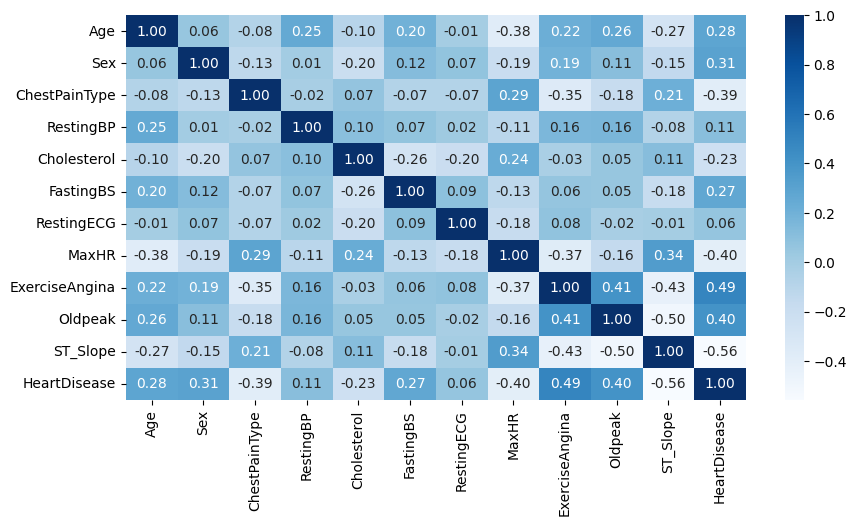

In [7]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(numeric_only=True), cbar=True, annot=True, cmap='Blues', fmt='.2f')
plt.show()

memisahkan variabel target dan atribut

In [8]:
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

X_train, X_test, y_train, y_test =  train_test_split(
    X, y, test_size=0.2, random_state=42
)

membuat model squensial

In [9]:
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Dense(
        16,
        activation='relu',
        input_shape=(11,)
    ),
    tf.keras.layers.Dense(
        32,
        activation = 'relu'
    ),
    tf.keras.layers.Dense(
        1,
        activation='sigmoid'
    ),
])
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
from tensorflow.keras.callbacks import EarlyStopping

# Membuat callback untuk early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=10)

In [16]:
trained_data = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, callbacks=early_stop)

Epoch 1/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8896 - loss: 0.2731 - val_accuracy: 0.8804 - val_loss: 0.3067
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8865 - loss: 0.2830 - val_accuracy: 0.8804 - val_loss: 0.2974
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9016 - loss: 0.2686 - val_accuracy: 0.8750 - val_loss: 0.3174
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8937 - loss: 0.2887 - val_accuracy: 0.8859 - val_loss: 0.3087
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8868 - loss: 0.3005 - val_accuracy: 0.8804 - val_loss: 0.3100
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8740 - loss: 0.3176 - val_accuracy: 0.8804 - val_loss: 0.3151
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8630 - loss: 0.3096 - val_accuracy: 0.8859 - val_loss: 0.3094
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.8983 - loss: 0.2800 - val_accuracy: 0.8

In [12]:
model.evaluate(X_test, y_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8683 - loss: 0.3164 


[0.3162553906440735, 0.8695651888847351]

In [13]:
threshold = 0.5
y_pred = model.predict(X_test)
y_pred= np.where(y_pred > threshold, 1, 0)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


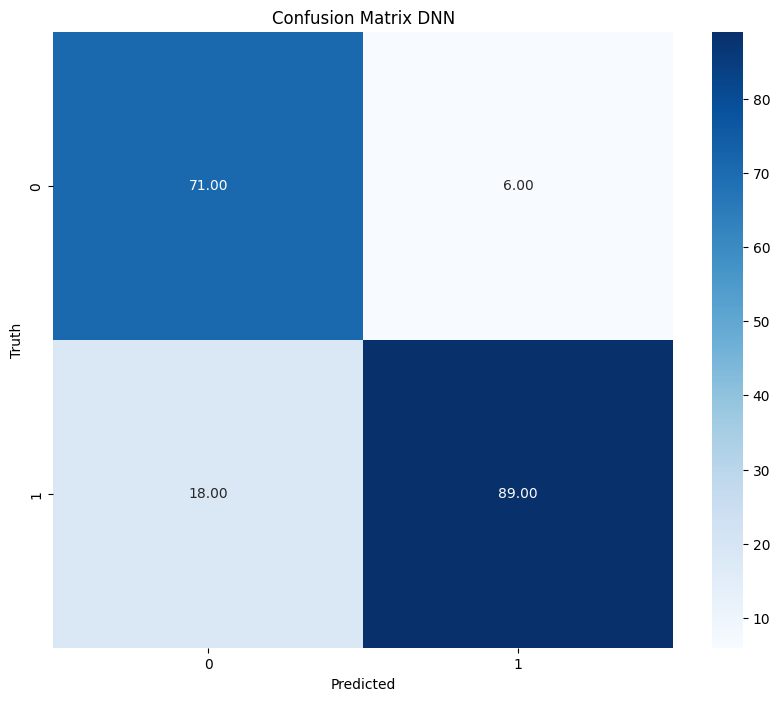

In [14]:
svm_cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10,8))
sns.heatmap(svm_cm, annot=True, fmt='.2f', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix DNN')
plt.show()

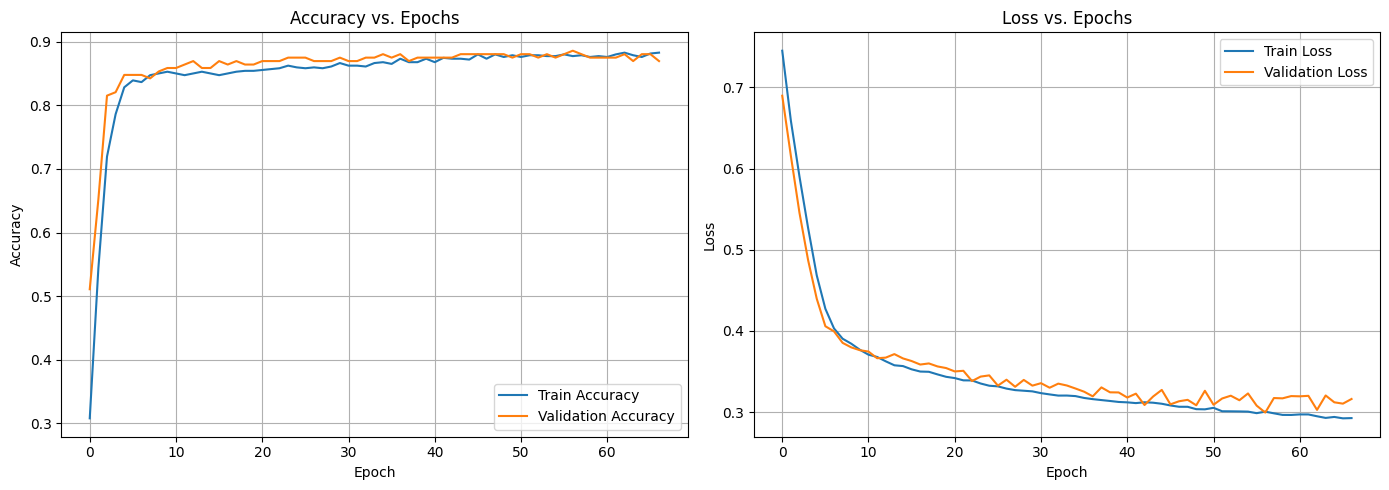

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(trained_data.history['accuracy'], label='Train Accuracy')
plt.plot(trained_data.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy vs. Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.grid(True)

# Buat grafik Loss
plt.subplot(1, 2, 2)
plt.plot(trained_data.history['loss'], label='Train Loss')
plt.plot(trained_data.history['val_loss'], label='Validation Loss')
plt.title('Loss vs. Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()